# Etude comparative de reconnaissance sonore des émotions (SER)

La reconnaissance sonore des émotions (Speech Emotion Recognition) est un domaine de l’intelligence artificielle qui permet de détecter l’émotion du locuteur à travers la voix. C’est généralement un sous-domaine de la reconnaissance des émotions, jumelé avec la reconnaissance faciale des émotions.

L'objet de cette étude comparative est de comparer les différents algorithmes d'apprentissage automatique (Machine Learning).

## Le dataset ANAD (Arabic Natural Audio Dataset) :

C'est l'un des rares [darasets en arabe](https://github.com/OmarMohammed88/AR-Emotion-Recognition) présents sur le net.

Huit vidéos d'appels en direct entre un présentateur et un auditeur à l'extérieur du studio ont été téléchargées à partir de talk-shows arabes en ligne. Chaque vidéo a ensuite été divisée en tours : appelants et récepteurs. Pour étiqueter chaque vidéo, 18 auditeurs ont été invités à écouter chaque vidéo et à sélectionner s'ils percevaient une émotion heureuse, en colère ou surprise. Le silence, les rires et les morceaux bruyants ont été supprimés. Chaque morceau a ensuite été automatiquement divisé en unités de parole de 1 seconde formant notre corpus final composé de 1384 enregistrements.

Le seul désagrément de ce dataset est l'obfuscation des fichiers .wav, ce qui nou aurait permis d'utiliser les MFCCs pour la génération des features.

Lien de téléchargement : https://www.kaggle.com/datasets/suso172/arabic-natural-audio-dataset/metadata

# Importation des données à partir du fichier CSV
## Importation des dépendances
Importation des API python nécessaires à l'éxecution des algorithmes d'apprentissage automatique : 

- TensorFlow 2 : Environnement d'exection
- Keras : Framework d'intelligence artificiiel utilisant TensorFlow
- Pandas : Api d'analyse et de manipulation de données
- sklearn : Scikit-learn, une bibliothèque libre Python destinée à l'apprentissage automatique
- matplotlib.pyplot, seaborn : Visualisation de schémas, courbes et images.
- google.colab : Pour utiliser les notebook sur collab

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
# Blablabla
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D

from google.colab import drive
drive.mount('/content/drive/')


MessageError: ignored

Chragement du dataset ANAD Normalisé du fichier ANAD_Normalized.csv :

In [ ]:
DATA_DIR = '/content/drive/My Drive/'

df = pd.read_csv( DATA_DIR + 'ANAD_Normalized.csv')
# head() permet de lire les 5 premières entrées du dataset
df.head()

,name,Emotion,Type,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr12,F0env_sma_de_iqr23,F0env_sma_de_iqr13
0,V2_1 (1).wav',surprised,2,0.285714,0,0.285714,0.414894,0.0,0,0,...,0.092117,0.294281,0.771490,0.589508,0.117983,0.017167,0.027963,0.013516,0.067167,2.028063
1,V2_1 (2).wav',surprised,2,0.285714,0,0.285714,0.404255,0.0,0,0,...,0.031789,0.203679,0.565664,0.335376,0.120382,0.027347,0.045084,0.044086,0.085771,3.003057
2,V2_1 (3).wav',surprised,2,0.285714,0,0.285714,0.404255,0.0,0,0,...,0.097341,0.341096,0.657804,0.451624,0.107132,0.017167,0.028058,0.054392,0.067393,2.663894
3,V2_1 (4).wav',surprised,2,0.285714,0,0.285714,0.404255,0.0,0,0,...,0.055432,0.245241,0.516015,0.350308,0.121571,0.020762,0.048233,0.013987,0.107900,3.138976
4,V2_1 (5).wav',surprised,2,0.142857,0,0.142857,0.606383,0.0,0,0,...,0.033673,0.199890,0.519454,0.265627,0.119747,0.022636,0.045822,0.028148,0.097964,3.087905


Lecture des labels du dataset :

In [ ]:
df['Emotion '].unique()

array(['surprised', 'angry', 'happy'], dtype=object)

On remarque qu'il y a trois Labels pour le dataset, et trois émotions basiques : Surprise, Colère, Heureux. Il suffit maintenant de comparer le nombre d'apparitions des émotions :

In [ ]:
df["Emotion "].value_counts()

angry        741
happy        505
surprised    137
Name: Emotion , dtype: int64

La colère est mieux représentée dans ce dataset, en raison de la nature des enregistrements propices au débat.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


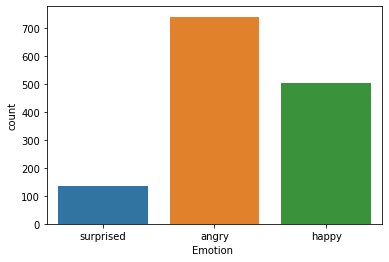

In [ ]:
sns.countplot(df['Emotion '])

Maintenant, nous devons supprimer les colonnes name, type et Emotion du dataset, pour ne garder que les features (X). Les labels sont stockés dans y.

In [ ]:
X = df.values
print('Forme avant : {}'.format(X.shape))
df_clean = df.drop(['name','Type','Emotion '],axis=1)
df_clean.head()

X = df_clean.values
y = df['Type'].values

print(y.shape)
print('Forme après : {}'.format(X.shape))

Forme avant : (1383, 847)
(1383,)
Forme après : (1383, 844)


Application de l'algorithme PCA (Principal component analysis): 

Réduction de la dimensionnalité linéaire à l'aide de la décomposition en valeurs singulières des données pour les projeter dans un espace de dimension inférieure. Passer de 844 à 40 dimensions.

In [ ]:
pca_m = PCA(n_components= 40)
pca_m.fit(X)

PCA(n_components=40)

Affichage du résultat :

In [ ]:
print('Forme avant : {}'.format(X.shape))
Xf = pca_m.transform(X)
print('Forme après : {}'.format(Xf.shape))


Forme avant : (1383, 844)
Forme après : (1383, 40)


Diviser le dataset en dataset d'apprentissage et dataset de test grâce à la fonction de sklearn, train_test_split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size=0.3)
print('Forme X_train : {}'.format(X_train.shape))
print('Forme X_test : {}'.format(X_test.shape))
print('Forme y_train : {}'.format(y_train.shape))
print('Forme y_test : {}'.format(y_test.shape))

Forme X_train : (968, 40)
Forme X_test : (415, 40)
Forme y_train : (968,)
Forme y_test : (415,)


Les données sont maintenant prête pour les algorithmes de machine learning (Pas encore prête pour le Deep Learning).

# Algorithme 1 : Machine Learning - Regression Logistique

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lg = lg_model.predict(X_test)
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93       149
           2       0.76      0.58      0.66        38
           3       0.95      0.97      0.96       228

    accuracy                           0.93       415
   macro avg       0.88      0.83      0.85       415
weighted avg       0.92      0.93      0.92       415



# Matrice de confusion
Génération de la matrice de confusion, qui permet de visualiser rapidement la précision du modèle à travers le dataset de test : On remarque que la colère et le bonheur sont bien définis et plus précis que la surprise, ce qui s'explique par le manque d'équilibre dans les données.

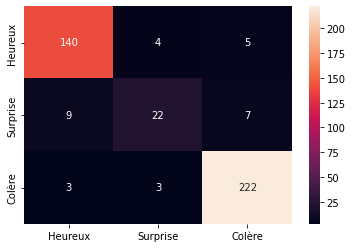

In [ ]:
lbls =["Heureux", "Surprise", "Colère"]
confusion_matrix_lg = pd.DataFrame(confusion_matrix(y_test, y_pred_lg), index=lbls, columns = lbls)
sns.heatmap(confusion_matrix_lg, annot = True, fmt = 'g')


# Algorithme 2 : Machine Learning - SVM

In [ ]:
grid = {'C': [1, 5, 40], 'gamma': [0.05, 0.1, 0.5, 1, 5]}
svm_m = GridSearchCV(SVC(),grid)
svm_m.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 40], 'gamma': [0.05, 0.1, 0.5, 1, 5]})

In [ ]:
y_pred_svm = svm_m.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94       149
           2       0.82      0.74      0.78        38
           3       0.95      0.98      0.97       228

    accuracy                           0.94       415
   macro avg       0.91      0.88      0.89       415
weighted avg       0.94      0.94      0.94       415



Dans cette nouvelle matrice de confusion pour le SVM, la précision est nettement meilleure, en particulier pour l'émotion "Surprise" qui compte 31 prédictions précises pour 44 entrées, soit une précision de 70%.

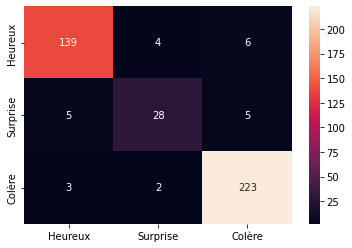

In [ ]:
lbls =["Heureux", "Surprise", "Colère"]
confusion_matrix_svm = pd.DataFrame(confusion_matrix(y_test, y_pred_svm), index=lbls, columns = lbls)
sns.heatmap(confusion_matrix_svm, annot = True, fmt = 'g')

# Alogorithme 3 - Deep Learning - DNN (Dense neural network)

Il faut d'abord utiliser la méthode to_categorical pour transformer les classes 1, 2, 3 en vecteur de 3 dimensions :

1 --> [1, 0, 0]
2 --> [0, 1, 0]
3 --> [0, 0, 1]

In [ ]:
y_train_dl = to_categorical(y_train)[:,1:]
y_test_dl = to_categorical(y_test)[:,1:]

y_train_dl.shape
y_test_dl.shape

(415, 3)

In [ ]:
dnn_m = Sequential()
dnn_m.add(Dense(units=48, activation='relu'))
dnn_m.add(Dense(units=24, activation='relu'))
dnn_m.add(Dense(units=8, activation='relu'))
# units=3 pour chaque émotion
dnn_m.add(Dense(units=3,activation='softmax'))
# 
dnn_m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
dnn_history = dnn_m.fit(x=X_train, y=y_train_dl, epochs=30, batch_size=48, validation_data=(X_test, y_test_dl), verbose=1)

Epoch 1/30
21/21 [==============================] - 1s 14ms/step - loss: 1.1406 - accuracy: 0.2293 - val_loss: 1.0617 - val_accuracy: 0.4193
Epoch 2/30
21/21 [==============================] - 0s 4ms/step - loss: 1.0458 - accuracy: 0.4360 - val_loss: 1.0197 - val_accuracy: 0.4289
Epoch 3/30
21/21 [==============================] - 0s 5ms/step - loss: 1.0036 - accuracy: 0.4246 - val_loss: 0.9760 - val_accuracy: 0.4241
Epoch 4/30
21/21 [==============================] - 0s 4ms/step - loss: 0.9598 - accuracy: 0.4318 - val_loss: 0.9295 - val_accuracy: 0.4434
Epoch 5/30
21/21 [==============================] - 0s 4ms/step - loss: 0.9139 - accuracy: 0.4659 - val_loss: 0.8845 - val_accuracy: 0.5229
Epoch 6/30
21/21 [==============================] - 0s 4ms/step - loss: 0.8670 - accuracy: 0.5186 - val_loss: 0.8372 - val_accuracy: 0.6000
Epoch 7/30
21/21 [==============================] - 0s 4ms/step - loss: 0.8145 - accuracy: 0.6271 - val_loss: 0.7794 - val_accuracy: 0.7084
Epoch 8/30
21/21 [=

13/13 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9398


[0.16467371582984924, 0.9397590160369873]

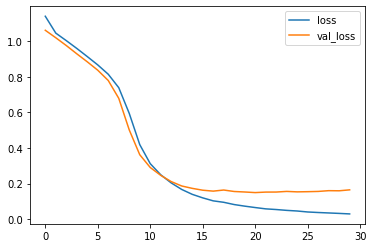

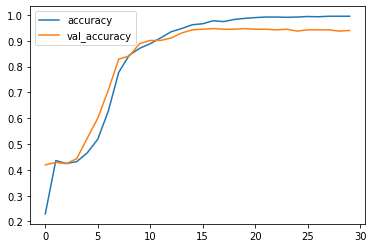

In [ ]:
loss = pd.DataFrame(dnn_history.history)
loss[['loss','val_loss']].plot()

loss[['accuracy','val_accuracy']].plot()
dnn_m.evaluate(X_test,y_test_dl)

In [ ]:
y_pred_dl = cnn_m.predict(X_test_dl)
lbls =["Heureux", "Surprise", "Colère"]
confusion_matrix_svm = pd.DataFrame(confusion_matrix(y_test_dl, y_pred_dl), index=lbls, columns = lbls)
sns.heatmap(confusion_matrix_svm, annot = True, fmt = 'g')

NameError: ignored

Algorithme 4 - Deep Learning CNN

In [ ]:
# Creation du model du CNN
model_cnn = Sequential()
# Créer une couche convolutif
model_cnn.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
# Remplacer les valeurs negatives par 0
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())
# model.add(Dropout(0.1))
# Le MAX pooling permet de réduire la taille des données à traiter
# Pour chaque 4 valeurs du tableau X en entrée, on choisit le maximum de ses 4 variables
model_cnn.add(MaxPooling1D(pool_size=(4)))
# Répéter encore une fois pour plus de précision
model_cnn.add(Conv1D(128, 5, padding='same', ))
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())
# model.add(Dropout(0.1))
model_cnn.add(MaxPooling1D(pool_size=(4)))
# Répéter encore une fois
model_cnn.add(Conv1D(256, 5, padding='same', ))
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())
# model.add(Dropout(0.1))
# Applatir le model et le mette comme un tableau à une dimension
model_cnn.add(Flatten())
# Définir les 8 neuronnes de sortie pour les labels
model_cnn.add(Dense(4))
model_cnn.add(Activation('softmax'))
# Résumé du model
model_cnn.summary()
# Compilation du modèl
model_cnn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # model.fit : Permet de lancer l'apprentisage du jeu de données
        # x_train_n : Matrice des Features
        # y_train : Tableau des Labels
        # batch_size : Taille du lot
        # epoch : Une itération sur l'ensemble du jeu de données
        # Remarque : Si on a un jeu de donnée de 48 lignes, avec un batch_size="16"
        # Il Faudra 3 itérations pour compléter un Epoch.


import numpy as np
# Dataset d'apprentissage
X_train_cnn = np.expand_dims(X_train, axis=2)
# Dataset de test
X_test_cnn = np.expand_dims(X_test, axis=2)
import tensorflow as tf
#y_train = tf.random.uniform((968, ), maxval=3, dtype=tf.int32)
#y_test = tf.random.uniform((415, ), maxval=3, dtype=tf.int32)
fit_history = model_cnn.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))


In [ ]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model_cnn.evaluate(X_test,y_test)

# Conclusion :
Les algroithmes d'apprentissage automatique donnent d'excellents résultats avec des précisions de 93% et 95% pour la regression logistique et le SVM. Les algorithmes de Deep Learning donnent des résultats supérieurs avec une meilleure optimisation.

## Références :
https://www.kaggle.com/datasets/suso172/arabic-natural-audio-dataset/code

https://github.com/OmarMohammed88/AR-Emotion-Recognition

# Installation 
A : Sur collab :
1. Uploader le fichier ANAD_normalized.csv dans la racine de Google Drive
2. Uploader le fichier le fichier etude_comparative.ipynb dans la racine de google drive
3. Double click sur le fichier etude_comparative.ipynb

B : En local
1. Mettre le fichier etude_comparative.ipynb dans un dossier.
2. Créer un dossier à l'interieur avec le nom "data".
3. Mettre le fichier ANAD_normalized.csv dans le dossier "data"
4. Supprimer les lignes :
from google.colab import drive
drive.mount('/content/drive/')
5. Replacer la ligne : DATA_DIR = '/content/drive/My Drive/'
par : DATA_DIR = 'data/'
